This notebook uses auto-regression techniques to study the behavior in the calibration value.

In [1]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker
#now lets try some autoregression
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from sklearn.preprocessing import MinMaxScaler

In [2]:
xtal_list = [54000,54001,54002,54003,54004,54005,54006,54007,54008,54009]
#preload test data
test_xtals = {}
results = {}
xtals_df = pd.DataFrame(columns=xtal_list)
for xtal in xtal_list:
    print('Loading xtal: {}'.format(xtal))
    suffix = '_{}.csv'.format(xtal)
    test = pd.read_csv('../data/test_diff'+suffix, index_col=0)
    
    test.index = pd.to_datetime(test.index)
    test = test[['p2']]
    test = test[test.index > '2018-11-08 00:00:00']
 #   print(test.head())
    
    test_xtals[xtal] = test
    xtals_df[xtal] = test.p2
    

Loading xtal: 54000
Loading xtal: 54001
Loading xtal: 54002
Loading xtal: 54003
Loading xtal: 54004
Loading xtal: 54005
Loading xtal: 54006
Loading xtal: 54007
Loading xtal: 54008
Loading xtal: 54009


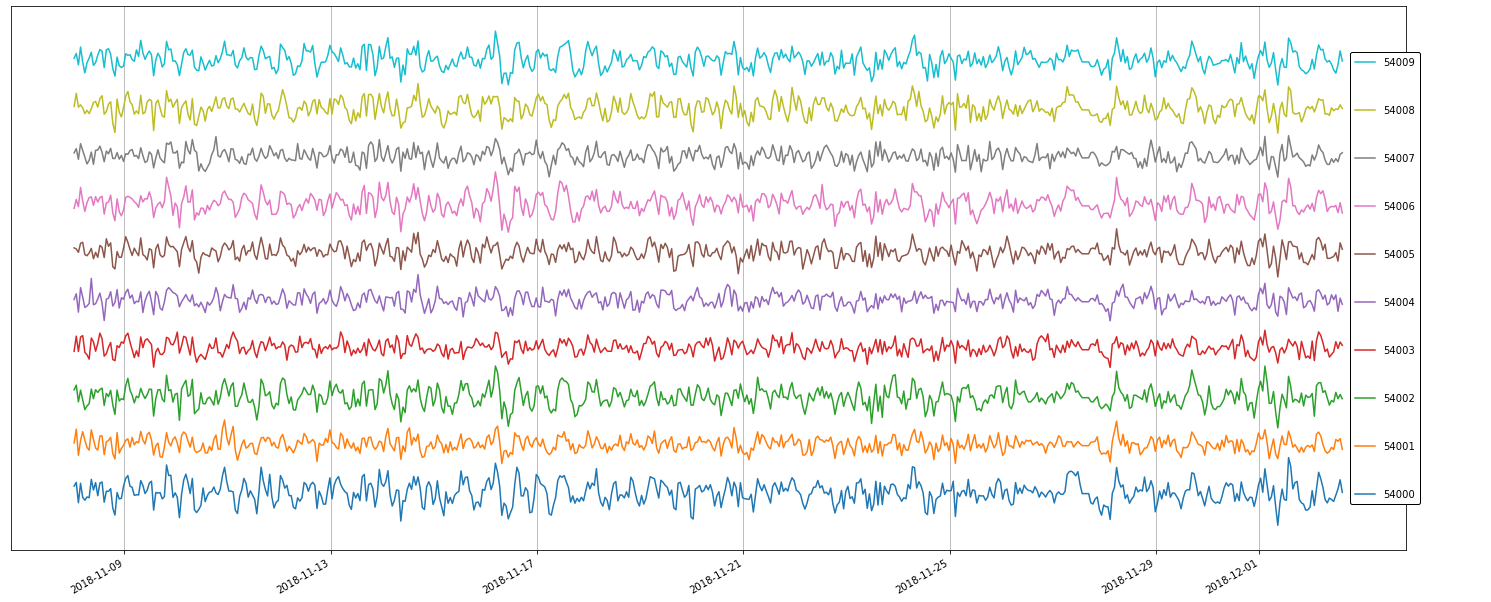

In [27]:
xtals_df_shft = xtals_df.copy()

for i,xtal in enumerate(xtal_list):
    xtals_df_shft[xtal] = xtals_df[xtal]+i*.0005
#plot = xtals_df_shft.plot(legend=False)
fig, ax = plt.subplots(figsize=(25,10))
ax.grid(b=True, axis='both')
ax.set_ylabel('Calibration values')
for xtal in xtal_list:
    ax.plot(xtals_df_shft[xtal],label=str(xtal))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
handles, labels = ax.get_legend_handles_labels()
ax.get_yaxis().set_visible(False)

fig.legend(handles[::-1], labels[::-1],ncol=1,labelspacing=3.8,loc=(0.905,0.162),edgecolor='black',facecolor='white',framealpha=1,borderpad=0.5)

fig.show()

In [28]:
xtal_list = [54000,54001,54002,54003,54004,54005,54006,54007,54008,54009]
#preload test data
test_xtals = {}
results = {}
xtals_df = pd.DataFrame(columns=xtal_list)
for xtal in xtal_list:
    print('Loading xtal: {}'.format(xtal))
    suffix = '_{}.csv'.format(xtal)
    test = pd.read_csv('../data/test_diff'+suffix, index_col=0)
    
    test.index = pd.to_datetime(test.index)
    test = test[['p2']]
    test = test[(test.index > '2018-11-13 00:00:00') & (test.index < '2018-11-17 00:00:00')]
 #   print(test.head())
    
    test_xtals[xtal] = test
    xtals_df[xtal] = test.p2
    

Loading xtal: 54000
Loading xtal: 54001
Loading xtal: 54002
Loading xtal: 54003
Loading xtal: 54004
Loading xtal: 54005
Loading xtal: 54006
Loading xtal: 54007
Loading xtal: 54008
Loading xtal: 54009


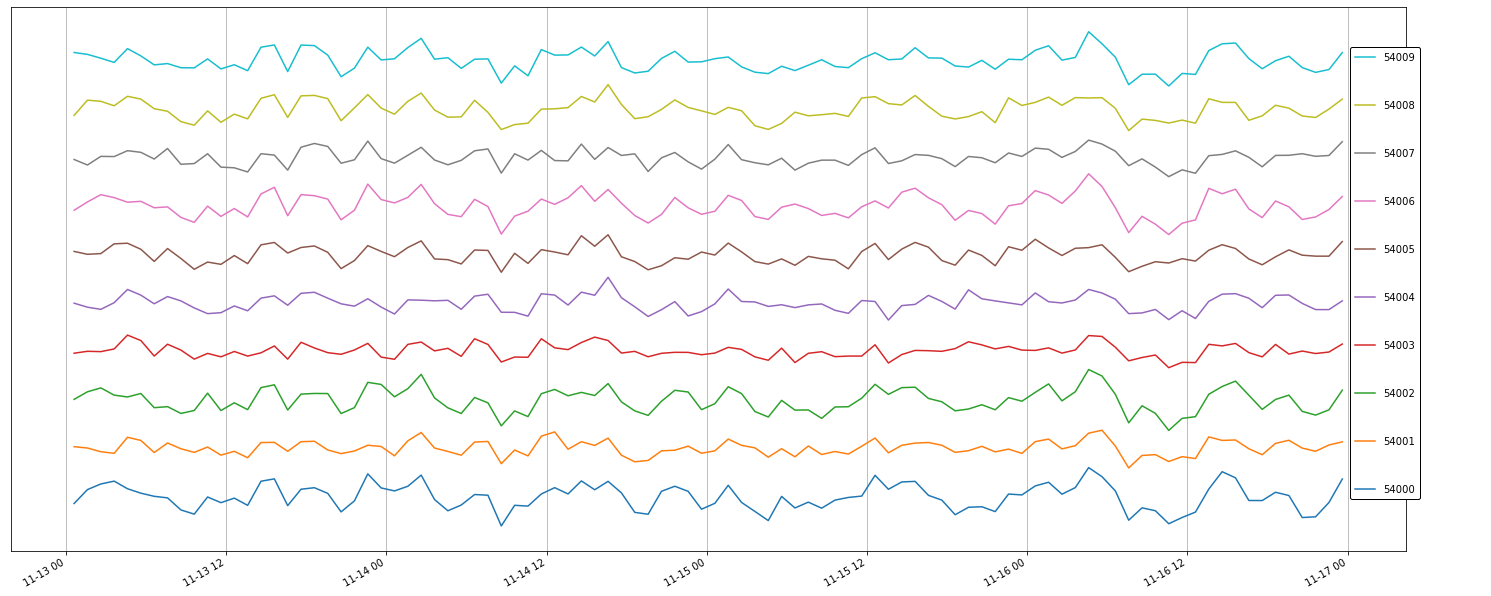

In [29]:
xtals_df_shft = xtals_df.copy()

for i,xtal in enumerate(xtal_list):
    xtals_df_shft[xtal] = xtals_df[xtal]+i*.0005
#plot = xtals_df_shft.plot(legend=False)
fig, ax = plt.subplots(figsize=(25,10))
ax.grid(b=True, axis='both')
ax.set_ylabel('Calibration values')
for xtal in xtal_list:
    ax.plot(xtals_df_shft[xtal],label=str(xtal))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
handles, labels = ax.get_legend_handles_labels()
ax.get_yaxis().set_visible(False)

fig.legend(handles[::-1], labels[::-1],ncol=1,labelspacing=3.8,loc=(0.905,0.162),edgecolor='black',facecolor='white',framealpha=1,borderpad=0.5)

fig.show()

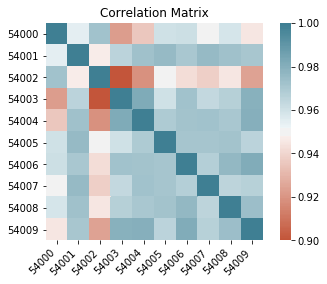

In [4]:
fig, ax = plt.subplots()

ax.set_title('Correlation Matrix')
corr = xtals_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=0.9, vmax=1, center=0.95,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#fix for matplotlib 3.1.1 issue (fixed in 3.1.2??)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

          54000     54001     54002     54003     54004     54005     54006  \
54000  1.000000  0.741100  0.932804  0.610446  0.536512  0.758128  0.914454   
54001  0.741100  1.000000  0.796769  0.770474  0.734416  0.769670  0.771795   
54002  0.932804  0.796769  1.000000  0.634905  0.571382  0.737736  0.912109   
54003  0.610446  0.770474  0.634905  1.000000  0.788959  0.677417  0.659645   
54004  0.536512  0.734416  0.571382  0.788959  1.000000  0.710072  0.632195   
54005  0.758128  0.769670  0.737736  0.677417  0.710072  1.000000  0.811427   
54006  0.914454  0.771795  0.912109  0.659645  0.632195  0.811427  1.000000   
54007  0.714195  0.731417  0.719538  0.729968  0.703358  0.729505  0.754356   
54008  0.855896  0.705362  0.826856  0.635369  0.586643  0.800895  0.859820   
54009  0.865784  0.828510  0.894826  0.716364  0.672983  0.782559  0.881427   

          54007     54008     54009  
54000  0.714195  0.855896  0.865784  
54001  0.731417  0.705362  0.828510  
54002  0.719538 

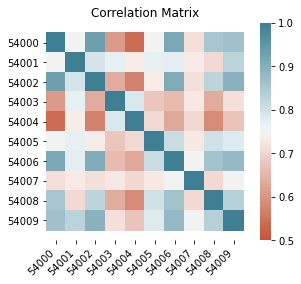

In [35]:
fig, ax = plt.subplots()

ax.set_title('Correlation Matrix')
corr = xtals_df[(xtals_df.index > '2018-11-13 00:00:00') & (xtals_df.index < '2018-11-17 00:00:00')].corr()
print(corr)
ax = sns.heatmap(
    corr, 
    vmin=0.5, vmax=1, center=0.75,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#fix for matplotlib 3.1.1 issue (fixed in 3.1.2??)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Loading xtal: 54000
                           p2
2018-05-12 09:01:31  0.000313
2018-05-12 10:01:31  0.000278
2018-05-12 11:01:31  0.000343
2018-05-12 12:01:31  0.000585
2018-05-12 13:01:31  0.000699
                           p2
2018-05-12 09:01:31  0.606049
2018-05-12 10:01:31  0.599961
2018-05-12 11:01:31  0.611185
2018-05-12 12:01:31  0.652975
2018-05-12 13:01:31  0.672792
                           p2
2018-10-15 01:36:23 -0.000080
2018-10-15 02:36:23  0.000068
2018-10-15 03:36:23  0.000013
2018-10-15 04:36:23 -0.000079
2018-10-15 05:36:23  0.000072
                           p2
2018-10-15 01:36:23  0.538027
2018-10-15 02:36:23  0.563726
2018-10-15 03:36:23  0.554162
2018-10-15 04:36:23  0.538222
2018-10-15 05:36:23  0.564354
                           p2      p2+1      p2+2
2018-10-15 01:36:23  0.538027  0.563726  0.554162
2018-10-15 02:36:23  0.563726  0.554162  0.538222
2018-10-15 03:36:23  0.554162  0.538222  0.564354
2018-10-15 04:36:23  0.538222  0.564354  0.559399
2018-10-15

/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/rusack/evans908/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dime

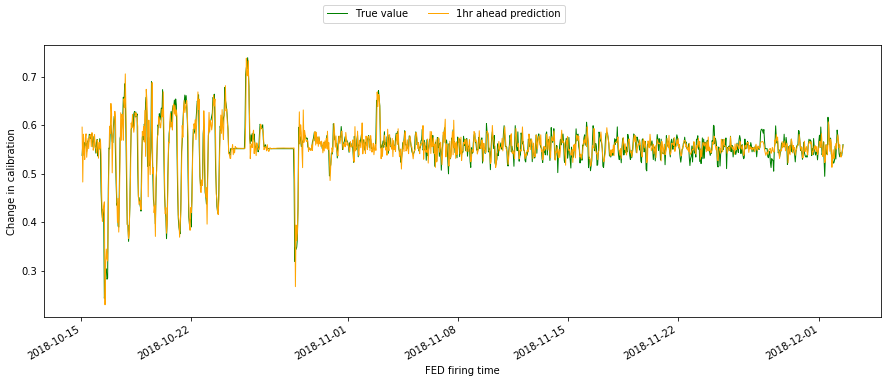

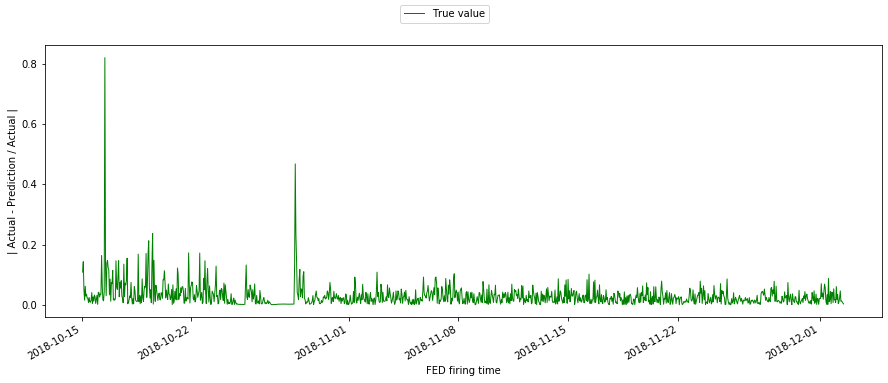

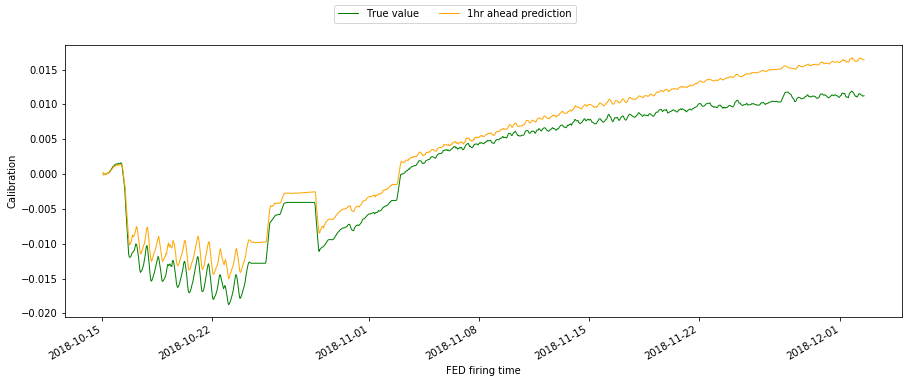

In [8]:
figs = []
xtal_list =[54000]
for xtal in xtal_list:
    #load the data###################################
    #the other xtals
    sub_list = xtal_list.copy()
    sub_list.remove(xtal)
    #
    print('Loading xtal: {}'.format(xtal))
    valid = pd.read_csv('../data/valid_diff'+suffix, index_col=0)
    train = pd.read_csv('../data/train_diff'+suffix, index_col=0)
    #set index to datetime
    
    valid.index = pd.to_datetime(valid.index)
    train.index = pd.to_datetime(train.index)
    #only take calibration values
    
    valid = valid[['p2']]
    train = train[['p2']]
    
    #lets pool the valid and train data together
    train = train.append(valid)

    #shape input data#################################
    
    scaler = MinMaxScaler()
    print(train.head())
    train['p2'] = scaler.fit_transform(train)[:,0]
    print(train.head())

    test = test_xtals[xtal].copy()
    print(test.head())
    test['p2'] = scaler.transform(test)[:,0]
    print(test.head())
    #Number of steps to forecast ahead
    test_shifted = test.copy()
    HORIZON = 3
    #create test data points for each horizon
    for t in range(1, HORIZON):
        test_shifted['p2+'+str(t)] = test_shifted['p2'].shift(-t, freq='H')

    test_shifted = test_shifted.dropna(how='any')
    print(test_shifted.head(5))

    #make predictions on the test data#################
    training_window = 500
    train_series = train['p2']
    test_series = test_shifted
    lag = 10

    history = [x for x in train_series]
    history = history[(-training_window):]
    predictions = list()
    for t in range(test_series.shape[0]):
        model = AutoReg(history, lag, old_names=False)
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=HORIZON)
        predictions.append(yhat)
        obs = list(test_series.iloc[t])

        # move the training window
        history.append(obs[0])
        history.pop(0)
        #print(test_series.index[t])
        #print(t+1, ': predicted =', yhat, 'expected =', obs)
    pred_np = np.array(predictions)
    #calculate MAPE
    mape1 = mape(pred_np[:,0], test_series['p2'])
    mape2 = mape(pred_np[:,1], test_series['p2+1'])
    mape3 = mape(pred_np[:,2], test_series['p2+2'])
    print('Evaluating AR({}) on same xtal:'.format(lag))
    print("\tMAPE prediction 1 hour  ahead: {:.1%}".format(mape1),
              "\n\tMAPE prediction 2 hours ahead: {:.1%}".format(mape2),
              "\n\tMAPE prediction 3 hours ahead: {:.1%}".format(mape3))
    my_mapes = [mape1, mape2, mape3]
    #make a pretty picture
    #lets make some plots##############################################
    fig1, ax1 = plt.subplots(figsize=(15,5))

    ax1.set_ylabel('Change in calibration')
    ax1.set_xlabel('FED firing time')
    plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')

    #actual data
    ax1.plot(test_series.index, test_series.p2, 
         label='True value', color='green', linewidth=1, linestyle='solid')
    ax1.plot(test_series.index, pred_np[:,0], 
         label='1hr ahead prediction', color='orange', linewidth=1, linestyle='solid')
    #legend
    fig1.legend(ncol=3, loc = 'upper center')
    

    ####MAKE DIFF PLOT########
    apdiff_series = ((test_series.p2 - pred_np[:,0]) / test_series.p2).abs()
    fig3, ax3 = plt.subplots(figsize=(15,5))

    ax3.set_ylabel('| Actual - Prediction / Actual |')
    ax3.set_xlabel('FED firing time')
    plt.setp(ax3.get_xticklabels(), rotation=30, horizontalalignment='right')

    #actual data
    ax3.plot(test_series.index, apdiff_series, 
         label='True value', color='green', linewidth=1, linestyle='solid')
    #legend
    fig3.legend(ncol=3, loc = 'upper center')
    
    
    #######CUMSUM PLOT###############
    fig2, ax2 = plt.subplots(figsize=(15,5))

    ax2.set_ylabel('Calibration')
    ax2.set_xlabel('FED firing time')
    plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
    #make cumulative data
    cs_ts = np.cumsum(scaler.inverse_transform(test_series[['p2']]))
    pred_df = test_series[['p2']].copy()
    pred_df['p2'] = pred_np[:,0]
    cs_ps = np.cumsum(scaler.inverse_transform(pred_df[['p2']]))
    #actual data
    ax2.plot(test_series.index, cs_ts, 
         label='True value', color='green', linewidth=1, linestyle='solid')
    ax2.plot(test_series.index, cs_ps, 
         label='1hr ahead prediction', color='orange', linewidth=1, linestyle='solid')
    #legend
    fig2.legend(ncol=3, loc = 'upper center')
    
    figs.append((fig1, fig2))
    results[xtal] = tuple(my_mapes)
    
    #PERSISTANCE MODEL
    fig4, ax4 = plt.subplots()
    
    


In [6]:
#now let's summarize everything

results_df = pd.DataFrame.from_dict(results, orient='index',columns=['MAPE1', 'MAPE2', 'MAPE3'])
results_df.head(10)

,MAPE1,MAPE2,MAPE3
54000,0.0292,0.039177,0.044977


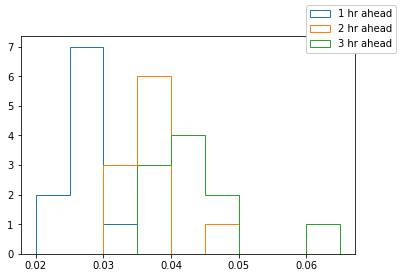

In [7]:
fig, ax = plt.subplots()
ax.hist(results_df.MAPE1,bins=[0.02,0.025,0.03,0.035,.04,.045,.05,.055,.06,.065],histtype='step',label='1 hr ahead')
ax.hist(results_df.MAPE2,bins=[0.02,0.025,0.03,0.035,.04,.045,.05,.055,.06,.065],histtype='step',label='2 hr ahead')
ax.hist(results_df.MAPE3,bins=[0.02,0.025,0.03,0.035,.04,.045,.05,.055,.06,.065],histtype='step',label='3 hr ahead')
fig.legend(loc='upper right',facecolor='white',framealpha=1)

/panfs/roc/msisoft/anaconda/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


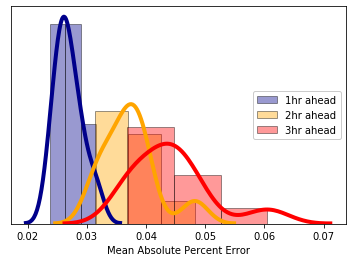

In [8]:
# Density Plot
sns.distplot(results_df.MAPE1, hist=True, kde=True, 
             bins=3, color = 'darkblue', label = '1hr ahead',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(results_df.MAPE2, hist=True, kde=True, 
             bins=3, color = 'orange', label = '2hr ahead',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax = sns.distplot(results_df.MAPE3, hist=True, kde=True, 
             bins=3, color = 'red', label = '3hr ahead',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#ax.hist(results_df.MAPE1,bins=[0.02,0.025,0.03,0.035,.04,.045,.05,.055,.06,.065],histtype='step',label='1 hr ahead')
#ax.hist(results_df.MAPE2,bins=[0.02,0.025,0.03,0.035,.04,.045,.05,.055,.06,.065],histtype='step',label='2 hr ahead')
#ax.hist(results_df.MAPE3,bins=[0.02,0.025,0.03,0.035,.04,.045,.05,.055,.06,.065],histtype='step',label='3 hr ahead')
ax.legend(loc='right',facecolor='white',framealpha=1)
ax.set_xlabel('Mean Absolute Percent Error')
ax.get_yaxis().set_visible(False)